In [1]:
import numpy as np #used for numeric computations and mathematical operations on arrays and matrices
import pandas as pd #used for data manipulation and analysis
import matplotlib.pyplot as plt #plot charts, graphs or histograms
import seaborn as sbn #used for data visualization
from sklearn.model_selection import train_test_split #sklearn stands for the library scikit_learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #metrics means measurements.

df=pd.read_csv("student_scores.csv") #reads csv file as a dataframe
print(df.head(), "\n")
print(df.info(), "\n")
print(df.describe(), "\n")

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   24 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None 

           Hours     Scores
count  24.000000  25.000000
mean    5.158333  51.480000
std     2.468747  25.286887
min     1.100000  17.000000
25%     3.075000  30.000000
50%     4.950000  47.000000
75%     7.475000  75.000000
max     9.200000  95.000000 



In [10]:
print("duplicated rows: ", df.duplicated().sum(), "\n") #check if there duplicated rows in the dataframe and return their sum
print("duplicated values in Scores column: ",df.duplicated(subset="Scores").sum(), "\n") #check if there duplicated values in the specified column

# df.drop_duplicates(subset=["Scores"]);
# print("df after removing duplicates: ",df)

print("dataFrame null values count:\n", df.isnull().sum(), "\n") #return null values count in each column separately and their dtype

# df=df.dropna() #remove the null (empty) cells from the columns
# print(df.isnull().sum(), "\n")

df=df.fillna(df.mean()) #fill the empty or null cells with the passed value, df.mean() return the average of the dataframe values
df

duplicated rows:  0 

duplicated values in Scores column:  2 

dataFrame null values count:  Hours     0
Scores    0
dtype: int64 



,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,5.158333,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


Text(0, 0.5, 'scores')

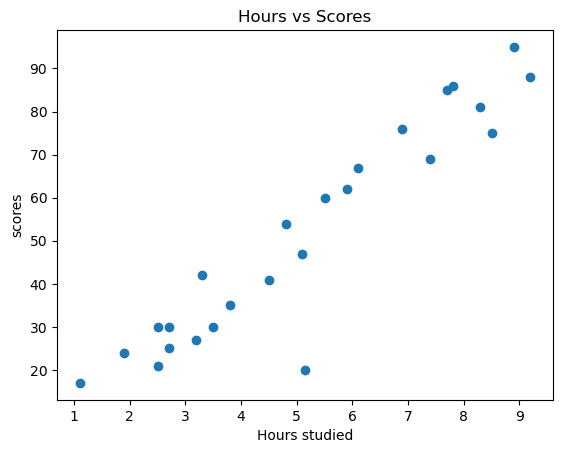

In [3]:
plt.scatter(df['Hours'], df['Scores'])
plt.title("Hours vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("scores")

In [4]:
print("correlation coefficient for dataframe columns: \n")
print(df.corr())
#print the correlation coefficient between the cloumns with it selves [طردى/عكسى تام ,طردى/عكسى قوى,طردى/عكسى ضعيف ]

correlation coefficient for dataframe columns: 

           Hours    Scores
Hours   1.000000  0.941427
Scores  0.941427  1.000000


In [ ]:
x=df[["Hours"]] #input feature. must be accessed with double nested square brackets [[]] to be 2D dataframe not 1D series
y=df["Scores"] #target variable

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
#random_state property used to bin the random data training approach each time we run this model
print("x_train: \n",x_train, "\n")
print("x_test: \n",x_test, "\n")

model=LinearRegression()
model.fit(x_train, y_train) #expects 2D dataframes for the first parameter (feature input), used to train the model on the passed data
predicted_y=model.predict(x_test)
y_prediction_check=pd.DataFrame({"actual data":y_test, "predicted data":predicted_y})
print(y_prediction_check, "\n")

mae=mean_absolute_error(y_test, predicted_y) # E[|Y-Y^|] 
mse=mean_squared_error(y_test, predicted_y) # E[(Y-Y^)^2]
r2=r2_score(y_test, predicted_y) #determination factor= 1-(SUM[(Y-Y^)^2]/SUM[(Y-Y~)^2])
# Y^ is the predicted (expected) value of Y, Y~ is the mean of Y
print("MAE: ",mae)
print("MSE: ",mse)
print("r2 score: ",r2)

 #learning the machine on dealing with dataset by splitting it to 80% for train and the later 20% for test

x_train: 
        Hours
9   2.700000
13  3.300000
1   5.100000
22  3.800000
5   5.158333
2   3.200000
12  4.500000
15  8.900000
3   8.500000
4   3.500000
20  2.700000
17  1.900000
21  4.800000
18  6.100000
24  7.800000
7   5.500000
10  7.700000
14  1.100000
19  7.400000
6   9.200000 

x_test: 
     Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9 

    actual data  predicted data
8            81       81.673664
16           30       25.046318
0            21       25.046318
23           76       68.004994
11           62       58.241659 

MAE:  4.2854022233694185
MSE:  23.882145506538674
r2 score:  0.959411717358024


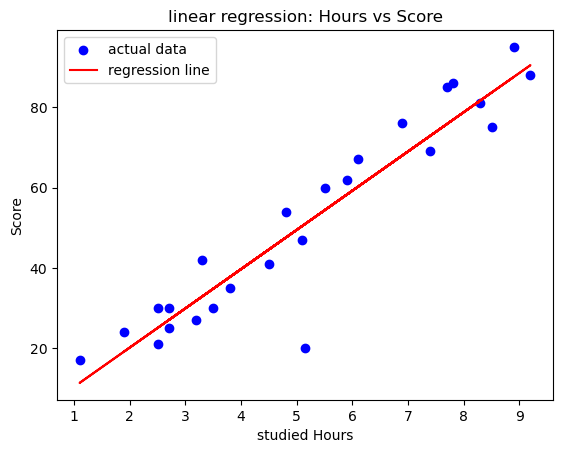

In [6]:
plt.scatter(x, y, color='blue', label="actual data")
# plt.plot(x, model.predict(x), color="red", label="regression line")
Y=model.coef_ * x + model.intercept_ 
#line equation gives the values of the vertical coordinate. equal the returned value of the previous 'model.predict(x)' parameter
plt.plot(x, Y, color="red", label="regression line")

plt.title("linear regression: Hours vs Score")
plt.xlabel("studied Hours")
plt.ylabel("Score")
plt.legend() # show the decalrative box of the gragh content labels
plt.show()

In [8]:
model.predict([[7.8]])

C:\Users\elmanahry\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([76.79199604])